## Install dependency packages if not current, including PSI Library

In [1]:
james_update_packages <- function(packageList){
	availableRepos <- getCRANmirrors()
	flag <- availableRepos$Country=="USA" & grepl("https",availableRepos$URL,)
	useRepos <- sample(availableRepos$URL[flag],1)

	## install missing packages, and update if newer version available
	for(i in 1:length(packageList)){
		if (!require(packageList[i],character.only = TRUE)){
    		install.packages(packageList[i], repos=useRepos)
   		}
	}

	update.packages(ask = FALSE, dependencies = c('Suggests'), oldPkgs=packageList, repos=useRepos)
}

packagelist <- c("devtools", "jsonlite", "openssl")
james_update_packages(packagelist)


# Install PSIlence from GitHub
devtools::install_github("privacytoolsproject/PSI-Library", ref="develop") 
library("PSIlence")


Loading required package: devtools
Loading required package: jsonlite
Loading required package: openssl
Warning message:
“dependencies ‘BiocManager’, ‘starsdata’, ‘rnaturalearthhires’, ‘statnet.common’, ‘Epi’, ‘effects’, ‘sylly.de’, ‘sylly.es’, ‘spDataLarge’, ‘FRB’, ‘LSAmitR’, ‘Rcampdf’, ‘Rgraphviz’, ‘tm.lexicon.GeneralInquirer’, ‘graph’, ‘earth’, ‘inlinedocs’, ‘globaltest’ are not available”also installing the dependencies ‘cobs’, ‘CDVine’, ‘TSP’, ‘csampling’, ‘neuralnet’, ‘RSNNS’, ‘janeaustenr’, ‘logcondens’, ‘crop’, ‘lcopula’, ‘mev’, ‘mvnormtest’, ‘partitions’, ‘qrng’, ‘randtoolbox’, ‘Runuran’, ‘VineCopula’, ‘LaplacesDemon’, ‘evd’, ‘hoa’, ‘skellam’, ‘triangle’, ‘actuar’, ‘h2o’, ‘NeuralNetTools’, ‘sparklyr’, ‘snowfall’, ‘mets’, ‘mstate’, ‘penalized’, ‘pROC’, ‘rbenchmark’, ‘lasso2’, ‘prim’, ‘copula’, ‘extraDistr’, ‘iplots’, ‘adabag’, ‘C50’, ‘Cubist’, ‘doParallel’, ‘mda’, ‘vip’, ‘cmprsk’, ‘CoxBoost’, ‘crrstep’, ‘riskRegression’, ‘ElemStatLearn’, ‘pbivnorm’, ‘shinythemes’, ‘SimDesign’, 


  There are binary versions available but the source versions are later:
                 binary    source needs_compilation
Runuran            0.26      0.27              TRUE
sjstats          0.17.2    0.17.3             FALSE
sjmisc            2.7.7     2.7.8             FALSE
neighbr             1.0     1.0.1             FALSE
umap            0.1.0.3   0.2.0.0              TRUE
loo               2.0.0     2.1.0             FALSE
dimRed            0.1.0     0.2.2             FALSE
latentnet         2.8.0     2.9.0              TRUE
ergm.userterms    3.1.1     3.9.0              TRUE
eiPack            0.1-8     0.1-9              TRUE
ergm              3.8.0     3.9.4              TRUE
broom             0.4.5     0.5.1             FALSE
multcomp          1.4-8    1.4-10             FALSE
rgl             0.99.16  0.100.19              TRUE
optimx         2013.8.7 2018-7.10             FALSE
rpanel            1.1-3     1.1-4             FALSE
polyclip          1.9-1    1.10-0         

Packages which are only available in source form, and may need
  compilation of C/C++/Fortran: ‘Rpoppler’ ‘BRugs’ ‘pcaL1’ ‘Rmpi’



The downloaded binary packages are in
	/var/folders/xq/l7fqjmss7pl_8cy28n_fz7680000gp/T//RtmpagvgUd/downloaded_packages


installing the source packages ‘Runuran’, ‘sjstats’, ‘sjmisc’, ‘Rpoppler’, ‘BRugs’, ‘neighbr’, ‘pcaL1’, ‘umap’, ‘doMPI’, ‘loo’, ‘dimRed’, ‘latentnet’, ‘ergm.userterms’, ‘Rmpi’, ‘eiPack’, ‘ergm’, ‘broom’, ‘multcomp’, ‘rgl’, ‘optimx’, ‘rpanel’, ‘polyclip’, ‘rgdal’, ‘gstat’, ‘devtools’

Warning message in install.packages(update[instlib == l, "Package"], l, repos = repos, :
“installation of package ‘sjmisc’ had non-zero exit status”Warning message in install.packages(update[instlib == l, "Package"], l, repos = repos, :
“installation of package ‘Rpoppler’ had non-zero exit status”Warning message in install.packages(update[instlib == l, "Package"], l, repos = repos, :
“installation of package ‘BRugs’ had non-zero exit status”Warning message in install.packages(update[instlib == l, "Package"], l, repos = repos, :
“installation of package ‘pcaL1’ had non-zero exit status”Warning message in install.packages(update[instlib == l, "Package"], l, repos = repos, :
“installation of package ‘Rmpi’ ha

## Load Data and Set Metadata

In [2]:
# Loading test data
data(PUMS5extract10000) # Load test dataset of PUMS responses, 10000 samples from California

my_data <- PUMS5extract10000 # This is included in the PSI library

my_data$race <- "white"   # Add categorical variable constructed from binary indicators
my_data$race[my_data$black==1] <- "black"
my_data$race[my_data$asian==1] <- "asian"
my_data$race[my_data$latino==1] <- "latino"

# Some necessary metadata
racevalues <- c("white", "black", "asian", "latino")
my_n <- nrow(my_data)  # Dataset size
my_age_bounds <- c(0,110)
my_income_bounds <- c(0,100000)

In [3]:
## Generate and print dp release of counts of each type
dp.release1 <- dpHistogram$new(mechanism="mechanismLaplace", var.type="character", variable="race", n=my_n,
                               epsilon=0.5, bins=racevalues, n.bins=length(racevalues))
dp.release1$release(my_data)
print(dp.release1$result$release)


  white black asian latino
1  5399   581  1253   2767


In [4]:
## Generate and print dp release of mean of age
dp.release2 <- dpMean$new(mechanism='mechanismLaplace', var.type='numeric', variable="age", n=my_n, epsilon=0.1,  rng=my_age_bounds)
dp.release2$release(my_data)

#value from here are stored in the dp.release2 object
mean.CI <- mean.getCI(release=dp.release2$result$release, epsilon=dp.release2$epsilon,
                      sensitivity=diff(dp.release2$rng)/dp.release2$n, alpha=0.05)
mean.epsilon <- mean.getParameters(accuracy=0.1, n=my_n, alpha=0.05, rng=my_age_bounds)
mean.errorPromise <- mean.getAccuracy(epsilon=0.5, n=my_n, alpha=0.05, rng=my_age_bounds)
mean.JSON <- PSIlence:::mean.getJSON()

cat("release:\n", dp.release2$result$release, "\n")
cat("CI:\n", mean.CI, "\n")
cat("epsilon:\n", mean.epsilon, "\n")
cat("error promise:\n", mean.errorPromise, "\n\n")
cat("empty JSON:", mean.JSON, "\n")


release:
 44.59206 
CI:
 44.26253 44.92159 
epsilon:
 0.3295306 
error promise:
 0.06590611 

empty JSON: {
  "statistic": ["Mean"],
  "description": ["Differentially Private Mean"],
  "mechanisms": ["Laplace"],
  "variableTypes": {
    "numeric": {
      "rTypes": ["numeric", "integer"],
      "fields": {
        "n": ["Number of observations"],
        "range": ["Ordered pair indicating effective lower and upper bounds"]
      }
    },
    "categorical": {
      "rTypes": ["logical"],
      "fields": {
        "n": ["Number of observations"],
        "range": ["Should be (0, 1)"]
      }
    }
  }
} 


In [5]:
## Generate and print binary tree of income
dp.release3 <- dpTree$new(mechanism="mechanismLaplace", var.type="numeric", variable="income", n=my_n,
                          rng=my_income_bounds, gran=100000/32, epsilon=0.3, alpha=0.05)
dp.release3$release(my_data)
print(dp.release3)


Reference class object of class "dpTree"
Field "mechanism":
[1] "mechanismLaplace"
Field "name":
[1] "Differentially private binary tree"
Field "variable":
[1] "income"
Field "var.type":
[1] "numeric"
Field "var.type.orig":
character(0)
Field "n":
[1] 10000
Field "epsilon":
[1] 0.3
Field "delta":
numeric(0)
Field "rng":
[1] 0e+00 1e+05
Field "result":
$release
 [1] 10000  9553   447  8188  1365   458     0  5995  2193   956   409   454
[13]     4    14     0  4088  1907  1370   824   674   281   238   171   466
[25]     0    11     0     0    25     9     0  2500  1587  1018   889   799
[37]   571   494   330   391   283   116   165    95   144   101    70   469
[49]     0    10     0     0    12     8     0     0    24     9     9     0
[61]     0     0     0

$variable
[1] "income"

$cdf
      val       cdf
1       0 0.0000000
2    3125 0.2476719
3    6250 0.4048940
4    9375 0.5057460
5   12500 0.5938181
6   15625 0.6729740
7   18750 0.7295423
8   21875 0.7784823
9   25000 0.8111750

## Show use of optimal composition theorem from above releases

In [8]:
globalDelta <- 10^-6
eps.1 <- 0.5
eps.2 <- 0.1
eps.3 <- 0.3
delta.1 <- delta.2 <- delta.3 <- globalDelta/3

params <- matrix(c(eps.1, delta.1,
	               eps.2, delta.2,
	               eps.3, delta.3), nrow=3, ncol=2, byrow=TRUE)

# The following function exists in the package to give composition by optimal composition theorem
# ':::'' is used for a function that is not exported from the package
# For implementation see: https://github.com/privacytoolsproject/PSI-Library/blob/develop/R/CompositionTheorems.R
# Or from R:> print(PSIlence:::KOVhet)
# 
# Args:
#	params: a kx2 matrix where the first column corresponds to epsilon_i values and the second 
# 			corresponds to delta_i values. 
#	d_g: global delta value
#   print: Boolean that if TRUE will print each individual term of the theorem rather than just
#          the minimimum.
#   
# Returns:
#	global epsilon value guaranteed from the composition

# Go into PSIlence and use this function because it is not normally exported
out <- PSIlence:::KOVhet(params=params, d_g=globalDelta, print=TRUE)  


First term:  0.9
Second term:  4.615501
Third term:  4.656657
Final result:  0.9 


## Demonstrate Error Promises and Epsilon Calculations

In [6]:
# Metadata values:
my.seq <- seq(from=log10(200), to=log10(1500), length=20)  	# make evenly spaced in logarithmic space
n.seq  <- round(10^my.seq)                                 	# round to integers

my.seq <- seq(from=log10(1), to=log10(0.01), length=5)     	# make evenly spaced in logarithmic space
ep.seq <- round(10^my.seq * 100) /100						# round to two decimal places

my.seq <- seq(from=log10(0.1), to=log10(0.01), length=5)
acc.seq <- round(10^my.seq * 100) /100

myrng <- c(0,1)

# Storage matrix:
agghistory <- matrix(NA, nrow=length(n.seq)*length(ep.seq), ncol=5)         # matrix to store results
aggcount <- 0                                               # counter

# Simulation:
for(i in 1:length(n.seq)){
	for(j in 1:length(ep.seq)){
		aggcount <- aggcount + 1
		agghistory[aggcount,1] <- n.seq[i]
		agghistory[aggcount,2] <- ep.seq[j]
		agghistory[aggcount,3] <- mean.getAccuracy(epsilon=ep.seq[j], n=n.seq[i], alpha=0.05, rng=myrng)
		agghistory[aggcount,4] <- mean.getParameters(accuracy=acc.seq[j], n=n.seq[i], alpha=0.05, rng=myrng)

	}
}

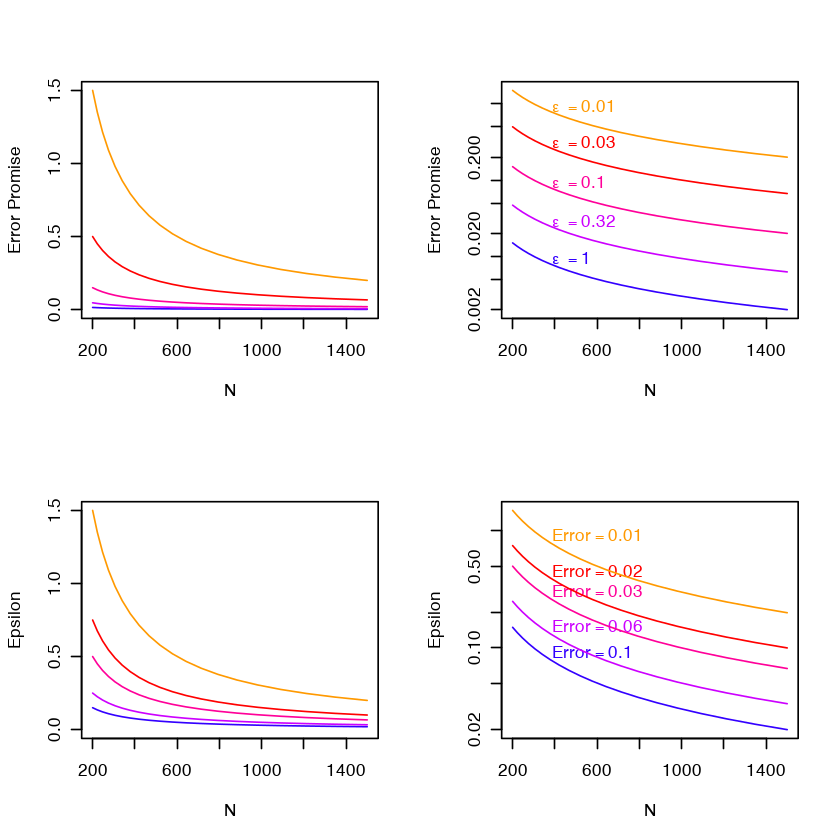

In [7]:
## Graphs for plotting results

par(mfrow=c(2,2))
color.palette<-rainbow(length(ep.seq), start=.7, end=.1)   # This creates a sequence of colors to use in subsequent plots, as in showchisq.r


for(j in 1:length(ep.seq)){
	flag <- agghistory[,2] == ep.seq[j]
	subhistory <- agghistory[flag,]

	allylim <- c(0, max(agghistory[,3]))

	if(j==1){
		plot(subhistory[,1],subhistory[,3], ylim=allylim, type="l", col=color.palette[j], xlab="N", ylab="Error Promise")
	}else{
		lines(subhistory[,1],subhistory[,3], col=color.palette[j])
	}
}

for(j in 1:length(ep.seq)){
	flag <- agghistory[,2] == ep.seq[j]
	subhistory <- agghistory[flag,]

	allylim <- c(min(agghistory[,3]), max(agghistory[,3]))

	xloc <- round(length(n.seq)*0.3)

	if(j==1){
		plot(subhistory[,1],subhistory[,3], ylim=allylim, type="l", log = "y", col=color.palette[j], xlab="N", ylab="Error Promise")
		text(x=subhistory[xloc,1], y=subhistory[xloc,3], label=  bquote(paste(epsilon == .(ep.seq[j]))), col=color.palette[j], pos=4)
	}else{
		lines(subhistory[,1],subhistory[,3], col=color.palette[j])
		text(x=subhistory[xloc,1], y=subhistory[xloc,3], label=  bquote(paste(epsilon == .(ep.seq[j]))), col=color.palette[j], pos=4) 
	}

}

for(j in 1:length(ep.seq)){
	flag <- agghistory[,2] == ep.seq[j]
	subhistory <- agghistory[flag,]

	allylim <- c(0, max(agghistory[,4]))

	if(j==1){
		plot(subhistory[,1],subhistory[,4], ylim=allylim, type="l", col=color.palette[j], xlab="N", ylab="Epsilon")
	}else{
		lines(subhistory[,1],subhistory[,4], col=color.palette[j])
	}
}

for(j in 1:length(ep.seq)){
	flag <- agghistory[,2] == ep.seq[j]
	subhistory <- agghistory[flag,]

	allylim <- c(min(agghistory[,4]), max(agghistory[,4]))

	xloc <- round(length(n.seq)*0.3)

	if(j==1){
		plot(subhistory[,1],subhistory[,4], ylim=allylim, type="l", log = "y", col=color.palette[j], xlab="N", ylab="Epsilon")
		text(x=subhistory[xloc,1], y=subhistory[xloc,4], label=  bquote(paste("Error" == .(acc.seq[j]))), col=color.palette[j], pos=4)
	}else{
		lines(subhistory[,1],subhistory[,4], col=color.palette[j])
		text(x=subhistory[xloc,1], y=subhistory[xloc,4], label=  bquote(paste("Error" == .(acc.seq[j]))), col=color.palette[j], pos=4) 
	}

}